In [46]:
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd



In [47]:
df=pd.read_csv('../Data/Telco_customer_churn.csv')

In [48]:
df.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


In [49]:
df.shape

(7043, 33)

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

In [51]:
df.describe()

,Count,Zip Code,Latitude,Longitude,Tenure Months,Monthly Charges,Churn Value,Churn Score,CLTV
count,7043.0,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,1.0,93521.964646,36.282441,-119.798880,32.371149,64.761692,0.265370,58.699418,4400.295755
std,0.0,1865.794555,2.455723,2.157889,24.559481,30.090047,0.441561,21.525131,1183.057152
min,1.0,90001.000000,32.555828,-124.301372,0.000000,18.250000,0.000000,5.000000,2003.000000
25%,1.0,92102.000000,34.030915,-121.815412,9.000000,35.500000,0.000000,40.000000,3469.000000
50%,1.0,93552.000000,36.391777,-119.730885,29.000000,70.350000,0.000000,61.000000,4527.000000
75%,1.0,95351.000000,38.224869,-118.043237,55.000000,89.850000,1.000000,75.000000,5380.500000
max,1.0,96161.000000,41.962127,-114.192901,72.000000,118.750000,1.000000,100.000000,6500.000000


In [52]:
df.columns

Index(['CustomerID', 'Count', 'Country', 'State', 'City', 'Zip Code',
       'Lat Long', 'Latitude', 'Longitude', 'Gender', 'Senior Citizen',
       'Partner', 'Dependents', 'Tenure Months', 'Phone Service',
       'Multiple Lines', 'Internet Service', 'Online Security',
       'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV',
       'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method',
       'Monthly Charges', 'Total Charges', 'Churn Label', 'Churn Value',
       'Churn Score', 'CLTV', 'Churn Reason'],
      dtype='object')

   Churn Value  Count  Percentage
0            0   5174   73.463013
1            1   1869   26.536987


Text(0.5, 1.0, 'Churn Value Distribution')

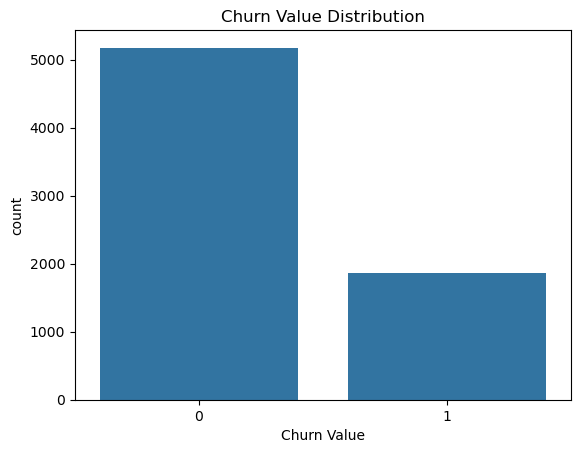

In [53]:
target = "Churn Value"
summary = (
    df.groupby(target)
      .size()
      .reset_index(name='Count')
)
summary['Percentage'] = summary['Count'] / summary['Count'].sum() * 100
print(summary)
sns.countplot(x=target, data=df)
plt.title('Churn Value Distribution')  

#Target Variable Distribution
#Approximately 26.5% of customers have churned, indicating a moderately imbalanced dataset.
#This suggests that evaluation metrics such as ROC-AUC, Precision-Recall, Recall, and F1-score will be more appropriate than accuracy alone.

In [54]:
(df.isnull().mean() * 100).sort_values(ascending=False)
"""missing Values in Churn Reason column
The 'Churn Reason' column has about 73.5% missing values, which
corresponds to customers who have not churned. This is expected, as only churned customers would have a reason for leaving.
No other columns have missing values, indicating good data quality overall """

"missing Values in Churn Reason column\nThe 'Churn Reason' column has about 73.5% missing values, which\ncorresponds to customers who have not churned. This is expected, as only churned customers would have a reason for leaving.\nNo other columns have missing values, indicating good data quality overall "


Churn Percentage for Gender
Churn Value      0      1
Gender                   
Female       73.08  26.92
Male         73.84  26.16


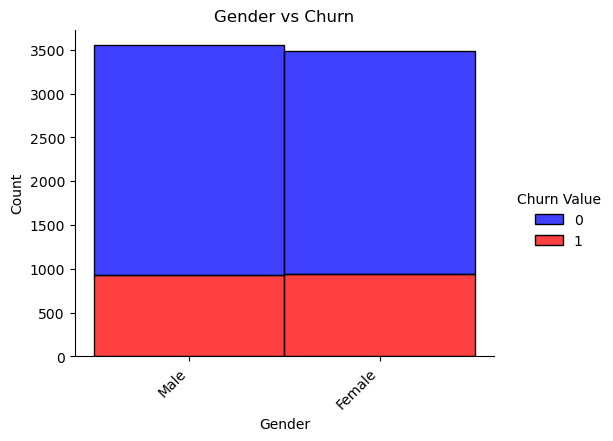


Churn Percentage for Senior Citizen
Churn Value         0      1
Senior Citizen              
No              76.39  23.61
Yes             58.32  41.68


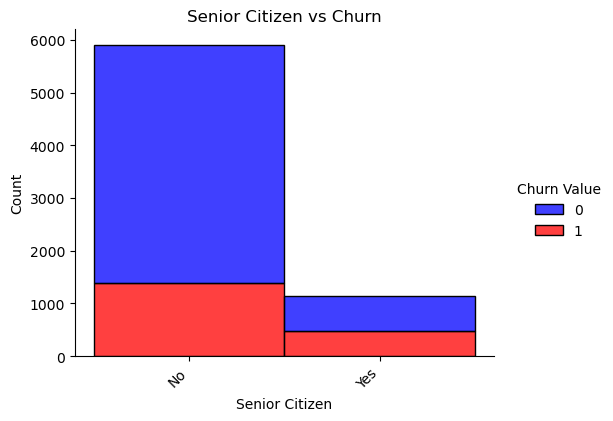


Churn Percentage for Partner
Churn Value      0      1
Partner                  
No           67.04  32.96
Yes          80.34  19.66


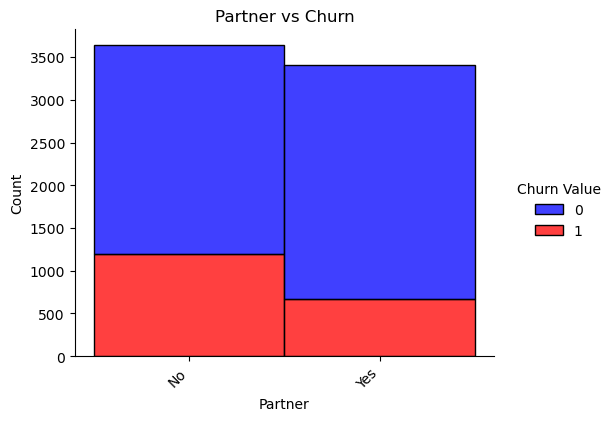


Churn Percentage for Phone Service
Churn Value        0      1
Phone Service              
No             75.07  24.93
Yes            73.29  26.71


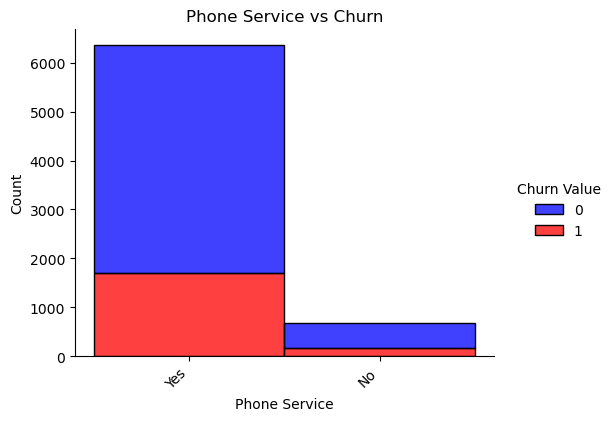


Churn Percentage for Multiple Lines
Churn Value           0      1
Multiple Lines                
No                74.96  25.04
No phone service  75.07  24.93
Yes               71.39  28.61


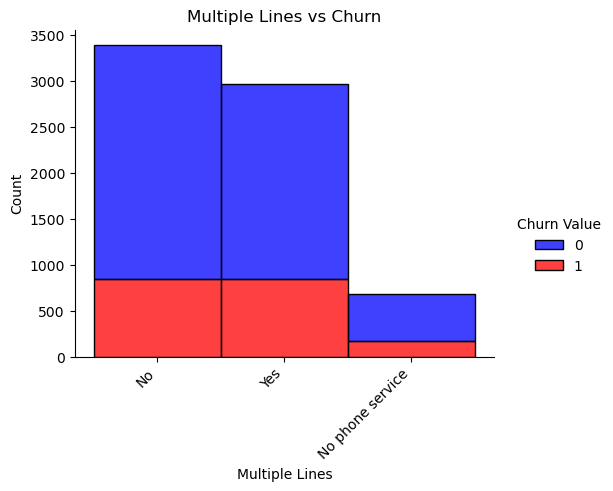


Churn Percentage for Internet Service
Churn Value           0      1
Internet Service              
DSL               81.04  18.96
Fiber optic       58.11  41.89
No                92.60   7.40


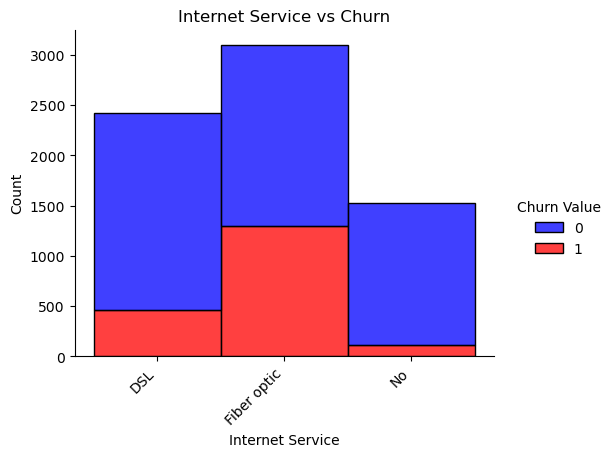


Churn Percentage for Online Security
Churn Value              0      1
Online Security                  
No                   58.23  41.77
No internet service  92.60   7.40
Yes                  85.39  14.61


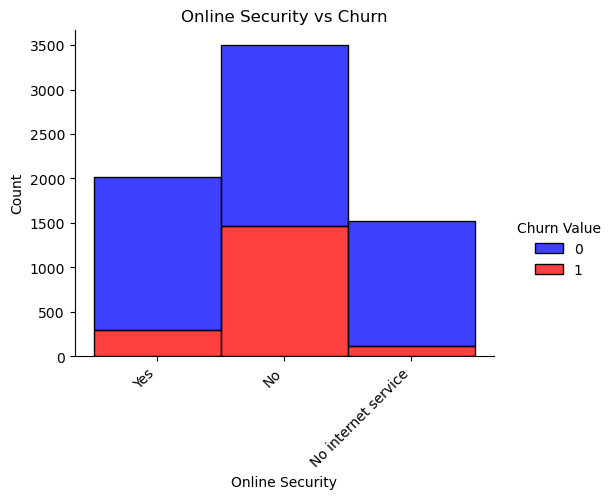


Churn Percentage for Online Backup
Churn Value              0      1
Online Backup                    
No                   60.07  39.93
No internet service  92.60   7.40
Yes                  78.47  21.53


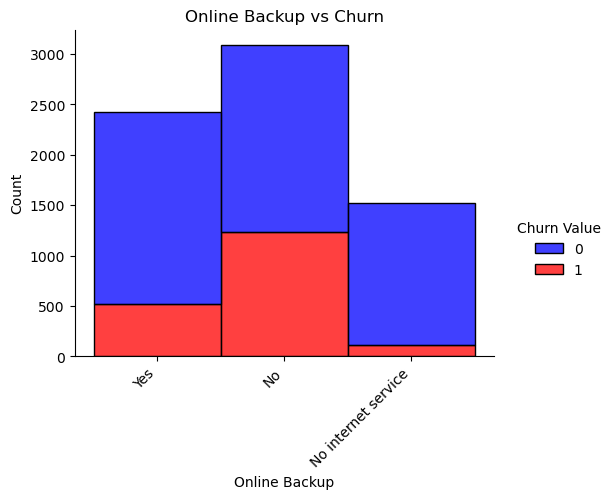


Churn Percentage for Device Protection
Churn Value              0      1
Device Protection                
No                   60.87  39.13
No internet service  92.60   7.40
Yes                  77.50  22.50


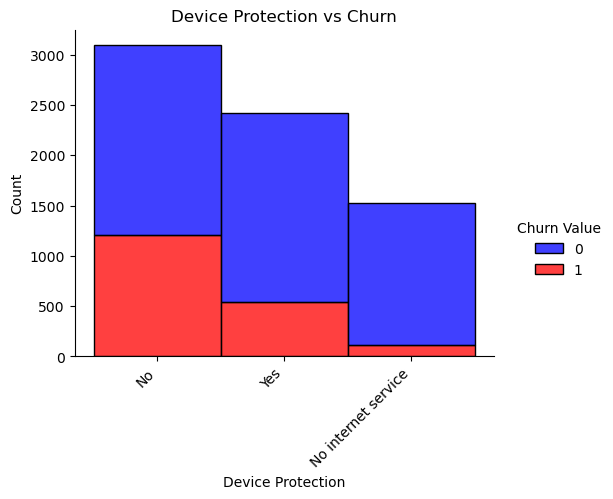


Churn Percentage for Tech Support
Churn Value              0      1
Tech Support                     
No                   58.36  41.64
No internet service  92.60   7.40
Yes                  84.83  15.17


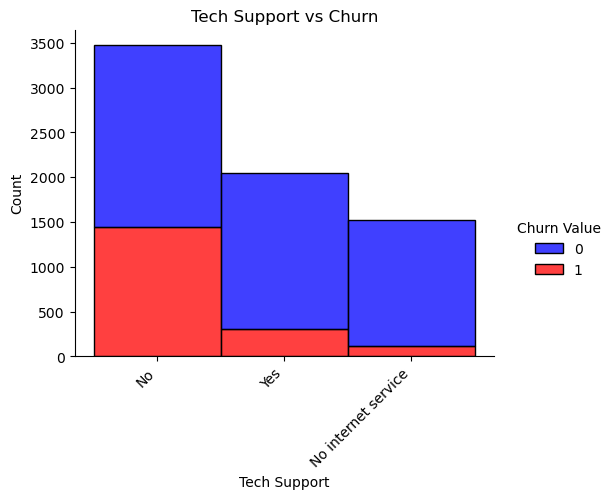


Churn Percentage for Streaming TV
Churn Value              0      1
Streaming TV                     
No                   66.48  33.52
No internet service  92.60   7.40
Yes                  69.93  30.07


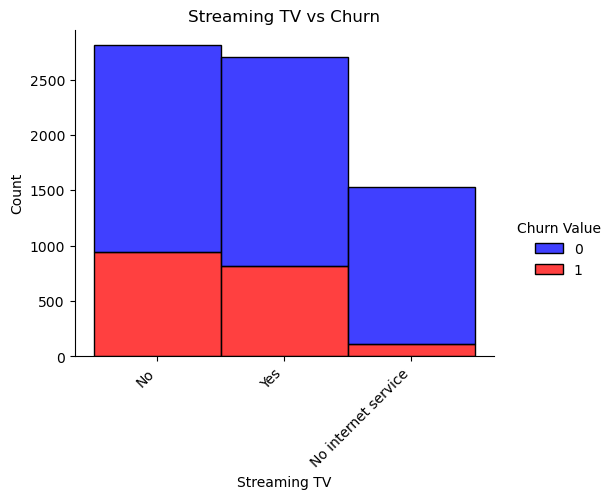


Churn Percentage for Streaming Movies
Churn Value              0      1
Streaming Movies                 
No                   66.32  33.68
No internet service  92.60   7.40
Yes                  70.06  29.94


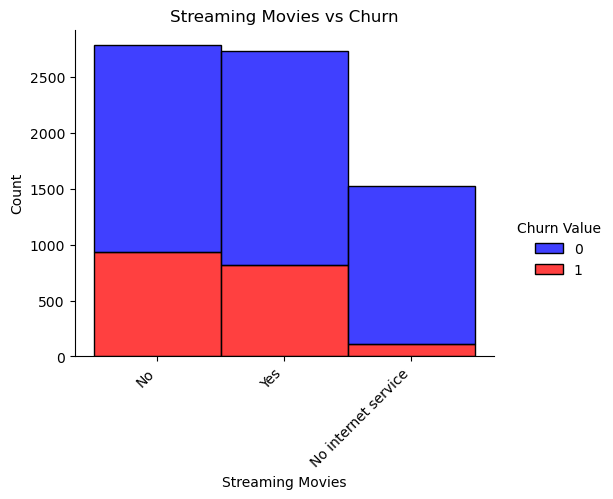


Churn Percentage for Paperless Billing
Churn Value            0      1
Paperless Billing              
No                 83.67  16.33
Yes                66.43  33.57


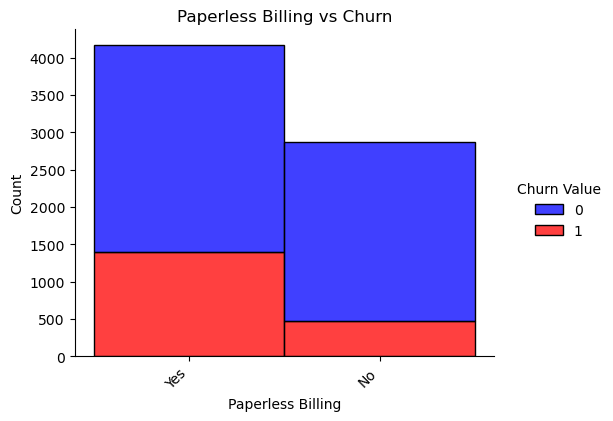


Churn Percentage for Payment Method
Churn Value                    0      1
Payment Method                         
Bank transfer (automatic)  83.29  16.71
Credit card (automatic)    84.76  15.24
Electronic check           54.71  45.29
Mailed check               80.89  19.11


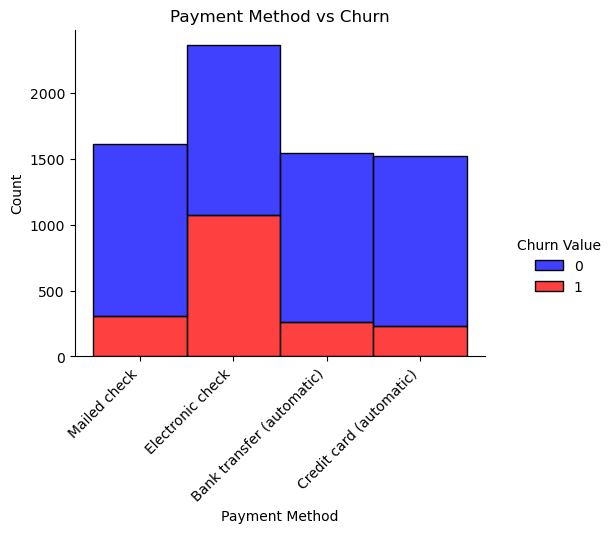

In [55]:
cat_cols = [
    "Gender",
    "Senior Citizen",
    "Partner",
    "Phone Service",
    "Multiple Lines",
    "Internet Service",
    "Online Security",
    "Online Backup",
    "Device Protection",
    "Tech Support",
    "Streaming TV",
    "Streaming Movies",
    "Paperless Billing",
    "Payment Method"
]

for col in cat_cols:
    churn_pct = (
        pd.crosstab(df[col], df["Churn Value"], normalize="index") * 100
    ).round(2)

    print(f"\nChurn Percentage for {col}")
    print(churn_pct)
    sns.displot(
        data=df,
        x=col,
        hue="Churn Value",
        multiple="stack",
        palette={1: "red", 0: "blue"},
        height=4,
        aspect=1.3
    )
    plt.xticks(rotation=45, ha='right')
    plt.title(f"{col} vs Churn")
    plt.show()


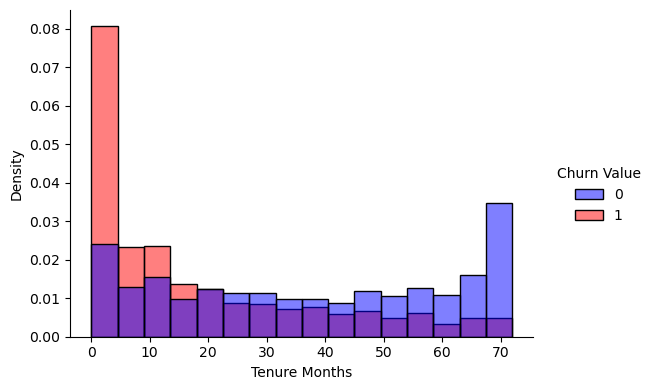

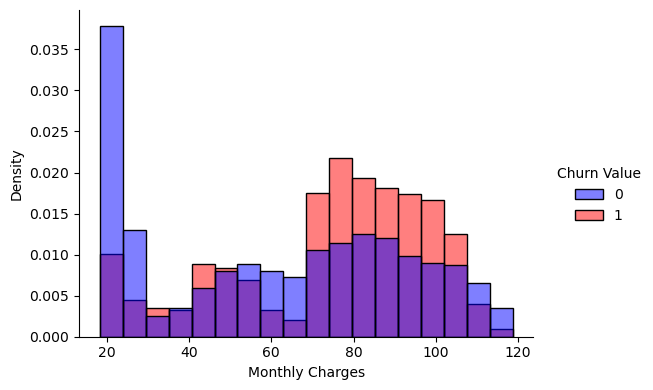

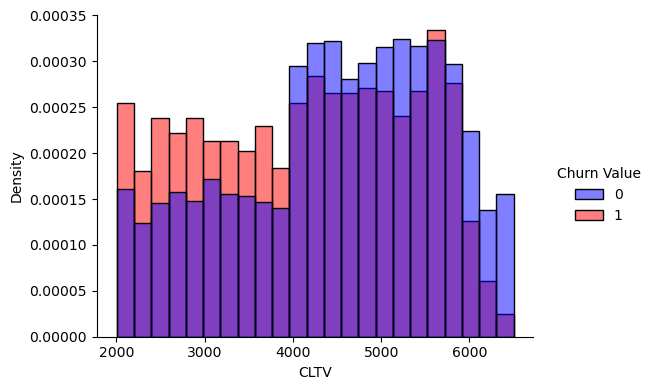

In [56]:
num_cols = [
    "Tenure Months",
    "Monthly Charges",
    "CLTV"
]

for col in num_cols:
    sns.displot(
        data=df,
        x=col,
        hue="Churn Value",
        kind="hist",
        stat="density",
        common_norm=False,
        palette={1: "red", 0: "blue"},
        height=4,
        aspect=1.4
    )
    plt.show()


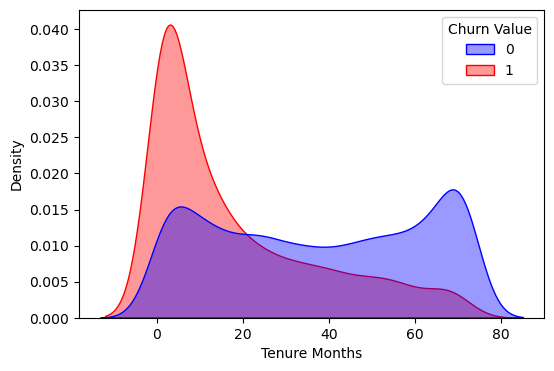

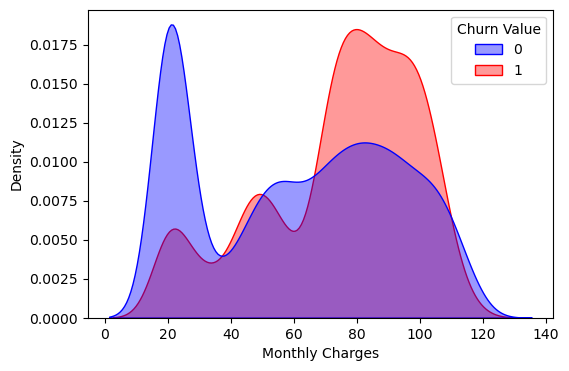

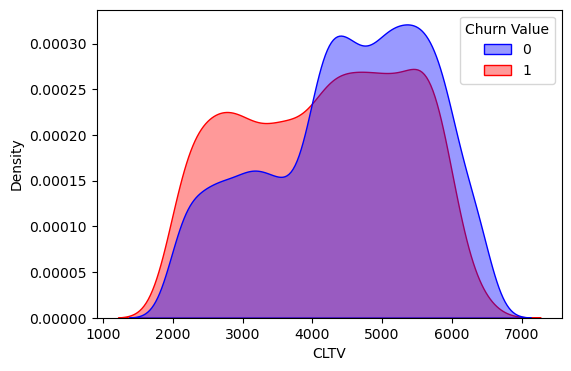

In [57]:
num_cols = [
    "Tenure Months",
    "Monthly Charges",
    "CLTV"
]

for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.kdeplot(
        data=df,
        x=col,
        hue="Churn Value",
        fill=True,
        common_norm=False,
        palette={1: "red", 0: "blue"},
        alpha=0.4
    )
    plt.show()


C:\Users\PUNITH\AppData\Local\Temp\ipykernel_17892\27362857.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby("Tenure_Bin")["Churn Value"] \


<Axes: title={'center': 'Churn Rate by Tenure Bins'}, xlabel='Tenure Bins', ylabel='Churn Rate (%)'>

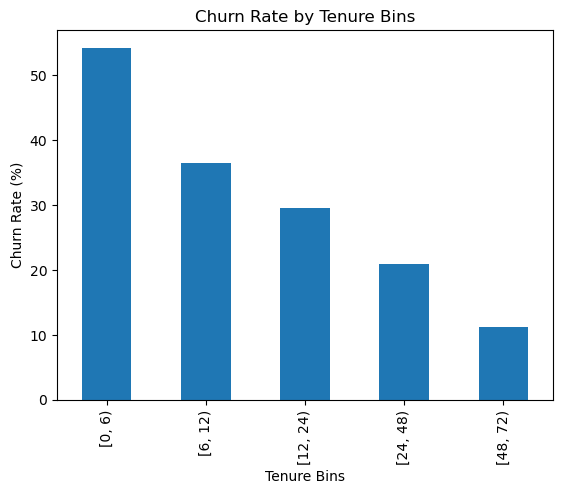

In [58]:
pd.cut(
    df["Tenure Months"],
    bins=[0, 6, 12, 24, 48, 72],
    right=False
).to_frame("Tenure_Bin") \
 .join(df["Churn Value"]) \
 .groupby("Tenure_Bin")["Churn Value"] \
 .mean() \
 .mul(100).plot(kind='bar', title='Churn Rate by Tenure Bins', ylabel='Churn Rate (%)', xlabel='Tenure Bins')


In [59]:
pd.pivot_table(
    data=df,
    index="Payment Method",
    columns="Churn Value",
    values="CustomerID",
    aggfunc="count"
)


Churn Value,0,1
Payment Method,,
Bank transfer (automatic),1286,258
Credit card (automatic),1290,232
Electronic check,1294,1071
Mailed check,1304,308


In [60]:
"""The overall churn rate is 26.5%, indicating a moderately imbalanced dataset where accuracy alone is not a reliable metric.

Tenure Months is the strongest numerical indicator of churn. Customers with low tenure show significantly higher churn, while long-tenure customers are far more stable.

Monthly Charges have a positive relationship with churn. Customers paying higher monthly fees are more likely to churn.

CLTV is lower for churned customers, suggesting that low-value customers are more prone to churn. However, CLTV should be used cautiously in modeling due to potential data leakage.

Service-related features are the strongest categorical drivers of churn:

Customers without Tech Support, Online Security, Online Backup, or Device Protection show churn rates around 40%+.

Customers with these services have substantially lower churn (~15–22%).

Internet Service type is a key churn factor:

Fiber optic customers have the highest churn (~42%)

DSL customers churn less (~19%)

Customers without internet service are highly stable (~7%).

Senior citizens are a high-risk segment, with churn rates nearly 2× higher than non-senior customers.

Customers without a partner churn significantly more than those with a partner, indicating higher stability among partnered customers.

Gender, Phone Service, and Streaming services show minimal churn differentiation and are weak predictors.

Geographic features such as City show churn variation, but due to high cardinality and sample-size sensitivity, they are better suited for exploratory insight rather than direct modeling."""

'The overall churn rate is 26.5%, indicating a moderately imbalanced dataset where accuracy alone is not a reliable metric.\n\nTenure Months is the strongest numerical indicator of churn. Customers with low tenure show significantly higher churn, while long-tenure customers are far more stable.\n\nMonthly Charges have a positive relationship with churn. Customers paying higher monthly fees are more likely to churn.\n\nCLTV is lower for churned customers, suggesting that low-value customers are more prone to churn. However, CLTV should be used cautiously in modeling due to potential data leakage.\n\nService-related features are the strongest categorical drivers of churn:\n\nCustomers without Tech Support, Online Security, Online Backup, or Device Protection show churn rates around 40%+.\n\nCustomers with these services have substantially lower churn (~15–22%).\n\nInternet Service type is a key churn factor:\n\nFiber optic customers have the highest churn (~42%)\n\nDSL customers churn le

In [62]:
df.isna().sum().sort_values(ascending=False)

Churn Reason         5174
Online Security         0
CLTV                    0
Churn Score             0
Churn Value             0
Churn Label             0
Total Charges           0
Monthly Charges         0
Payment Method          0
Paperless Billing       0
Contract                0
Streaming Movies        0
Streaming TV            0
Tech Support            0
Device Protection       0
Online Backup           0
CustomerID              0
Count                   0
Multiple Lines          0
Phone Service           0
Tenure Months           0
Dependents              0
Partner                 0
Senior Citizen          0
Gender                  0
Longitude               0
Latitude                0
Lat Long                0
Zip Code                0
City                    0
State                   0
Country                 0
Internet Service        0
dtype: int64

In [63]:
cols = [
    "Streaming Movies",
    "Online Security",
    "Online Backup",
    "Device Protection",
    "Tech Support",
    "Streaming TV",
    "Multiple Lines"
]

for col in cols:
    print(f"\n{col}")
    print(df[col].unique())



Streaming Movies
['No' 'Yes' 'No internet service']

Online Security
['Yes' 'No' 'No internet service']

Online Backup
['Yes' 'No' 'No internet service']

Device Protection
['No' 'Yes' 'No internet service']

Tech Support
['No' 'Yes' 'No internet service']

Streaming TV
['No' 'Yes' 'No internet service']

Multiple Lines
['No' 'Yes' 'No phone service']
